In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation, preprocessing, linear_model
import sklearn
sklearn.__version__

/Users/ikumaoka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'0.19.1'

## Housing datasetの読み込み

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
X_rm=df[['RM']].values
X_rm

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [4]:
X=df.iloc[:, 0:13]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


In [5]:
Y=df['MEDV'].values

## データ整形

In [9]:
sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)
sc.fit(X_rm)
X_rm =sc.transform(X_rm)

## データの分割(2割をテストデータにする)

In [10]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)
X_rm_train, X_rm_test, Y_train, Y_test = cross_validation.train_test_split(X_rm, Y, test_size=0.2, random_state=0)

## SGD Regressorを適用する

In [11]:
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X_train, Y_train)
 
clf_rm = linear_model.SGDRegressor(max_iter=1000)
clf_rm.fit(X_rm_train, Y_train)
 
print("全部使用したときの回帰式の係数")
print(clf.intercept_) 
print(clf.coef_) 

全部使用したときの回帰式の係数
[22.48048995]
[-1.02761379  1.04024875  0.03518719  0.5967471  -1.86880452  2.60406751
 -0.08420213 -2.91555739  2.12152201 -1.85041999 -2.2633298   0.73937118
 -3.51837685]


<function matplotlib.pyplot.show(*args, **kw)>

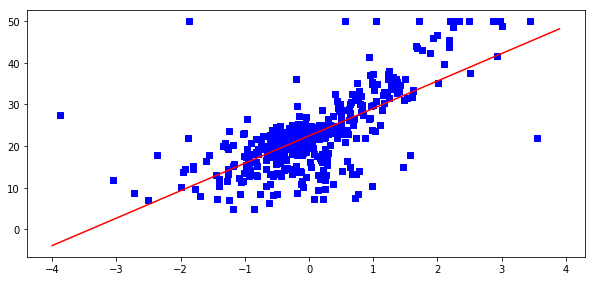

In [12]:
%matplotlib inline
 
line_X=np.arange(-4, 4, 0.1) #3から10まで1刻み
line_Y=clf_rm.predict(line_X[:, np.newaxis])
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(X_rm_train, Y_train, c='b', marker='s')
plt.plot(line_X, line_Y, c='r')
plt.show


「RMだけの平均2乗誤差」と「全部を使用したときの平均二乗誤差」
46.90417713769309
33.461997016999625


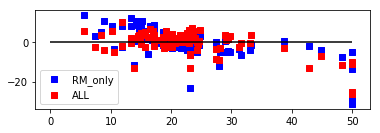

In [13]:
Y_rm_pred=clf_rm.predict(X_rm_test)
plt.subplot(2, 1, 2)
plt.scatter(Y_test, Y_rm_pred-Y_test, c='b', marker='s', label="RM_only")
 
Y_pred=clf.predict(X_test)
plt.scatter(Y_test, Y_pred-Y_test, c='r', marker='s',label="ALL")
plt.legend()
plt.hlines(y=0, xmin=0, xmax=50, colors='black')
plt.show
 
print("\n「RMだけの平均2乗誤差」と「全部を使用したときの平均二乗誤差」")
RMS=np.mean((Y_pred - Y_test) ** 2)
RMS_rm=np.mean((Y_rm_pred - Y_test) ** 2)
print(RMS_rm)
print(RMS)